# Backpropagation in Multilayer Neural Networks

Diving deep: implement a real gradient descent in `Numpy`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
import numpy as np
from functools import reduce

def plot_prediction(model, sample_idx=0, classes=range(10)):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0.imshow(scaler.inverse_transform(X_test[sample_idx]).reshape(8, 8), cmap=plt.cm.gray_r,
               interpolation='nearest')
    ax0.set_title("True image label: %d" % y_test[sample_idx]);
    ax0.grid(False)
    ax0.axis('off')


    ax1.bar(classes, one_hot(len(classes), y_test[sample_idx]), label='true')
    ax1.bar(classes, model.forward(X_test[sample_idx]), label='prediction', color="red")
    ax1.set_xticks(classes)
    prediction = model.predict(X_test[sample_idx])
    ax1.set_title('Output probabilities (prediction: %d)'
                  % prediction)
    ax1.set_xlabel('Digit class')
    ax1.legend()

## Dataset
- [sklearn.datasets.load_digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
N = reduce(lambda x,y: x*y,digits.images[0].shape)
print("Image dimension : N=%d"%N)
K = len(set(digits.target))
print("Number of classes : K=%d"%K)

Image dimension : N=64
Number of classes : K=10


### Example

(-0.5, 7.5, 7.5, -0.5)

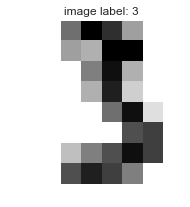

In [3]:
sample_index = 45
fig =plt.figure(figsize=(3, 3))
ax = fig.add_subplot(1,1,1)
ax.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
ax.set_title("image label: %d" % digits.target[sample_index])
ax.grid(False)
ax.axis('off')


### Preprocessing

- Normalization
- Train / test split

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
print("Data dimension and type")
print("X_train : " + str(X_train.shape) + ", " +str(X_train.dtype))
print("y_train : " + str(y_train.shape) + ", " +str(y_train.dtype))
print("X_test : " + str(X_test.shape) + ", " +str(X_test.dtype))
print("y_test : " + str(y_train.shape) + ", " +str(y_train.dtype))

Data dimension and type
X_train : (1527, 64), float32
y_train : (1527,), int32
X_test : (270, 64), float32
y_test : (1527,), int32


## Utils Function

Write utils function that will be used later

### One-hot encoding function

$$
OneHotEncoding(4,N_{class}=K) = 
\begin{bmatrix}
  0\\
  0\\
  0\\
  0\\
  1\\
  0\\
  0\\
  0\\
  0\\
  0\\
\end{bmatrix}
$$

**Exercise :** Implement the **one hot encoding** function of an integer array for a fixed number of classes (similar to keras' `to_categorical`):  
Ensure that your function works for several vectors at a time.  

In [6]:
# Write here the one_hot function
def one_hot(y, n_classes):
    ##
    return ohy

In [55]:
# %load solutions/one_hot_encoding.py

Make sure the solution works on 1D array :

In [10]:
ohy = one_hot(y=3,n_classes=10)
print("Expected : array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]) \n")
print("Computed  :" + str(ohy))

Expected : array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]) 

Computed  :[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Make sure the solution works on 2D array :

In [11]:
ohY = one_hot(n_classes=10, y=[0, 4, 9, 1])
print("Expected : [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] \n [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] \n  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] \n  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]")
print("Computed  :" + str(ohY))

Expected : [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Computed  :[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### The softmax function

$$
softmax(\mathbf{x}) = \frac{1}{\sum_{i=1}^{n}{e^{x_i}}}
\cdot
\begin{bmatrix}
  e^{x_1}\\\\
  e^{x_2}\\\\
  \vdots\\\\
  e^{x_n}
\end{bmatrix}
$$

**Exercise :** Implement the softmax function.  
Ensure that your function works for several vectors at a time.  
Hint : use the *axis* and *keepdims* argument of the numpy function `np.sum`.

In [12]:
# keepdims option
x = np.array([[1,2,3],
              [4,5,6]])

print("Sum all elements of array :")
sx = np.sum(x)
print(sx)

print("Sum all elements over axis (dimension) :" )
sx = np.sum(x, axis=-1)
print(str(sx), str(", Dimension :") ,str(sx.shape))

print("Sum all elements over axis and with keepdims (dimension) :" )
sx = np.sum(x, axis=-1,  keepdims=True)
print(str(sx), str(", Dimension :") ,str(sx.shape))

Sum all elements of array :
21
Sum all elements over axis (dimension) :
[ 6 15] , Dimension : (2,)
Sum all elements over axis and with keepdims (dimension) :
[[ 6]
 [15]] , Dimension : (2, 1)


In [13]:
# Write here the softmax function
def softmax(x):
    ###
    return softmaxX

In [16]:
# %load solutions/softmax.py

Make sure that you function workds on 1D array :

In [17]:
x = [10, 2, -3]
sx = softmax(x)
print("Expected : [9.99662391e-01 3.35349373e-04 2.25956630e-06]")
print("Computed " + str(sx))
print("Value Sum to one : %d" %np.sum(sx))

Expected : [9.99662391e-01 3.35349373e-04 2.25956630e-06]
Computed [9.99662391e-01 3.35349373e-04 2.25956630e-06]
Value Sum to one : 1


Make sure that you function workds on 2D array :

In [18]:
X = np.array([[10, 2, -3],
              [-1, 5, -20]])
sX = softmax(X)
print("Expected : [[9.99662391e-01 3.35349373e-04 2.25956630e-06] \n [2.47262316e-03 9.97527377e-01 1.38536042e-11]]")
print("Value found" + str(sX))
print("Value Sum to one : " + str(np.sum(sX, axis=-1)))

Expected : [[9.99662391e-01 3.35349373e-04 2.25956630e-06] 
 [2.47262316e-03 9.97527377e-01 1.38536042e-11]]
Value found[[9.99662391e-01 3.35349373e-04 2.25956630e-06]
 [2.47262316e-03 9.97527377e-01 1.38536042e-11]]
Value Sum to one : [1. 1.]


### Negative Log Likelihood function

The definition of the log likelihood function according to course's notation : 
$$ -\log (f(x))_y = -  \sum_{k=1}^K  \mathbb{1}_{y=k} \log (f(x))_k= \ell( f(x),y)
$$

where $(f(x))_k =  \mathbb{P}(Y=k/x)$


**Exercice**:  
Write a function that compute the mean negative likelihood of a group of predictions `Y_true` and `Fx`, where `Y_true`and `Fx` are the one-hot encoded representation of the label and the predictions. i.e. :

* `Y_true` is the one-hot encoded representation of $y$
* `Fx` is the output of a softmax function.

In [19]:
# Write here the negative_log_likelihood function
EPSILON = 1e-8
def NegLogLike(Y_true, Fx):
    ###
    return nll_mean


In [22]:
# %load solutions/negative_log_likelihood_function.py

Make sure that your implementation can compute the negative log likelihood for a single prediction

In [23]:
# Simple case
ohy_true = [1, 0, 0]
fx = [.99, 0.01, 0] 
nll1 = NegLogLike(ohy_true, fx)
print("Good prediction :")
print("Exepected value : 0.01005032575249135")
print("COmputed : " + str(nll1) )

# Case with bad prediction
ohy_true = [1, 0, 0]
fx = [0.01, .99, 0] 
nll2 = NegLogLike(ohy_true, fx)
print("Bad prediction (Higher loss function):")
print("Exepected value : 4.605169185988592")
print("COmputed : " + str(nll2) )

Good prediction :
Exepected value : 0.01005032575249135
COmputed : 0.01005032575249135
Bad prediction (Higher loss function):
Exepected value : 4.605169185988592
COmputed : 4.605169185988592


Make sure that your implementation can handle zero-case prediction

In [24]:
# Zero case
ohy_true = [1, 0, 0]
fx = [0, 0.01, 0.99] 
nll3 = NegLogLike(ohy_true, fx)
print("Good prediction :")
print("COmputed : " + str(nll3) )


Good prediction :
COmputed : 18.420680743952367


Make sure that your implementation can compute the average negative log likelihood for several predictions

In [25]:
ohY_true = np.array([[0, 1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

Fx = np.array([[0,   1,    0],
                   [.99, 0.01, 0],
                   [0,   0,    1]])

nll4 = NegLogLike(ohY_true, Fx)
print("Bad prediction (Higher loss function):")
print("Exepected value : 0.0033501019174971905")
print("COmputed : " + str(nll4) )

Bad prediction (Higher loss function):
Exepected value : 0.0033501019174971905
COmputed : 0.0033501019174971905


### Sigmoid Function

- Implement the `sigmoid` and its element-wise derivative `dsigmoid` functions:

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

$$
dsigmoid(x) = sigmoid(x) \cdot (1 - sigmoid(x))
$$

In [26]:
def sigmoid(X):
    ###
    return sigX


def dsigmoid(X):
    ###
    return dsig

In [29]:
# %load solutions/sigmoid.py

Display the sigmoid function and tis derivative

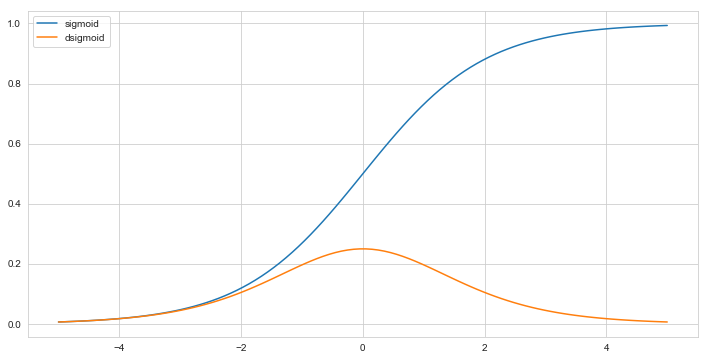

In [30]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
x = np.linspace(-5, 5, 100)
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, dsigmoid(x), label='dsigmoid')
ax.legend(loc='best');

## Logistic Regression

In this section we will implement a logistic regression model trainable with SGD **one sample at a time**.

### Implementation

Complete the `LogisticRegression` class by following these steps (Use the function you write above) :

**Notation** : $x \in \mathbb{R}^N$, $y \in [0,...,K]$, $W \in \mathbb{R}^{K,N}$, $b \in \mathbb{R}^K$


1.  Implement the `forward` function:  
$$f(x) = softmax(\mathbf{W} x + b)$$

2. Implement the `grad_loss`function which computes the derivative of the loss function (for an for an $x$ and its corresponding expected output $y$) with respect to the parameters of the function$W$ and $b$ :

\begin{array}{ll} 
   grad_W &= \frac{d}{dW} [-\log (f(x))_y] \\
   grad_b &= \frac{d}{db} [-\log (f(x))_y]
\end{array}

**Hint**  
\begin{array}{ll}
    \frac{d}{dW_{i,j}} [-\log (f(x))_y] &= 
    \begin{cases}
      [f(x)_{y}-1]*x_j, & \text{if}\ i=y \\
      f(x)_{i}*x_j, & \text{otherwise}
    \end{cases} \\
    \frac{d}{db_{i}} [-\log (f(x))_y] &= 
    \begin{cases}
      f(x)_{y}-1, & \text{if}\ i=y \\
      f(x)_{i}, & \text{otherwise}
    \end{cases} \\
\end{array}
       

3. Implement the `train` function which uses the grad function output to update $\mathbf{W}$ and $b$ with traditional SGD update without momentum :
\begin{array}{ll}
W &= W - \lambda \frac{d}{dW} [-\log (f(x))_y]\\
b &= b - \lambda \frac{d}{db} [-\log (f(x))_y]
\end{array}

In [31]:
class LogisticRegression():

    def __init__(self, input_size, output_size):
        self.W = np.random.uniform(size=(input_size, output_size),
                                   high=0.1, low=-0.1)
        self.b = np.random.uniform(size=output_size,
                                   high=0.1, low=-0.1)
        self.output_size = output_size
        
    def forward(self, X):
        ###
        return sZ
    

    def grad_loss(self, x, y_true):
        ###
        grads = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        ### 
    
        
    def loss(self, x, y):
        nll = NegLogLike(one_hot(self.output_size, y), self.forward(x))
        return nll
    
    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        acc = np.mean(y_preds == y)
        return acc 

IndentationError: expected an indented block (<ipython-input-31-0ff40d51210c>, line 24)

In [56]:
# %load solutions/lr_class

### Evaluate the model without training

In [58]:
# Init the model
lr = LogisticRegression(N, K)

print("Evaluation of the un£trained model:")
train_loss = lr.loss(X_train, y_train)
train_acc = lr.accuracy(X_train, y_train)
test_acc = lr.accuracy(X_test, y_test)

print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (train_loss, train_acc, test_acc))

Evaluation of the un£trained model:
train loss: 2.3144, train acc: 0.130, test acc: 0.133


Evaluate the randomly initialized model on the first example:

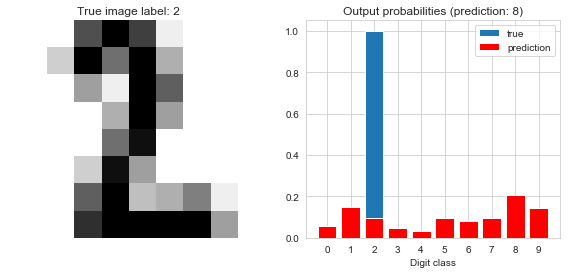

In [59]:
plot_prediction(lr, sample_idx=0)

### Train the model for one epoch

In [60]:
learning_rate = 0.01

for i, (x, y) in enumerate(zip(X_train, y_train)):
    lr.train(x, y, learning_rate)
    if i % 100 == 0:
        train_loss = lr.loss(X_train, y_train)
        train_acc = lr.accuracy(X_train, y_train)
        test_acc = lr.accuracy(X_test, y_test)
        print("Update #%d, train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
              % (i, train_loss, train_acc, test_acc))

Update #0, train loss: 2.2773, train acc: 0.132, test acc: 0.130
Update #100, train loss: 1.2384, train acc: 0.759, test acc: 0.763
Update #200, train loss: 0.8332, train acc: 0.877, test acc: 0.881
Update #300, train loss: 0.6256, train acc: 0.904, test acc: 0.926
Update #400, train loss: 0.5221, train acc: 0.910, test acc: 0.933
Update #500, train loss: 0.4528, train acc: 0.923, test acc: 0.933
Update #600, train loss: 0.3960, train acc: 0.929, test acc: 0.926
Update #700, train loss: 0.3597, train acc: 0.933, test acc: 0.948
Update #800, train loss: 0.3391, train acc: 0.936, test acc: 0.956
Update #900, train loss: 0.3165, train acc: 0.938, test acc: 0.944
Update #1000, train loss: 0.2989, train acc: 0.943, test acc: 0.952
Update #1100, train loss: 0.2808, train acc: 0.950, test acc: 0.963
Update #1200, train loss: 0.2698, train acc: 0.950, test acc: 0.974
Update #1300, train loss: 0.2607, train acc: 0.952, test acc: 0.948
Update #1400, train loss: 0.2452, train acc: 0.954, test acc

Evaluate the trained model on the first example:

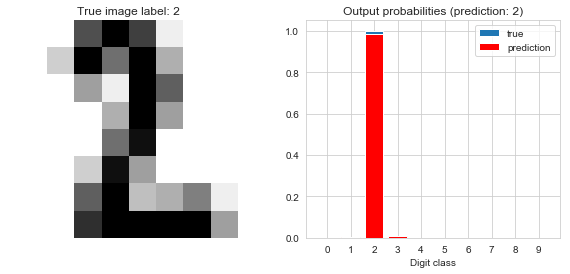

In [61]:
plot_prediction(lr, sample_idx=0)

## Multi Layer Perceptron


In this section we will implement a neural network model with one hidden layer using the sigmoid activation.
You will implement the backpropagation algorithm (SGD with the chain rule) 

### Implementation

Complete the `NeuralNet` class following these step

**Notation** : $x \in \mathbb{R}^N$, $h \in \mathbb{R}^H$, $y \in [0,...,K]$, $W^{h} \in \mathbb{R}^{H,N}$, $b^h \in \mathbb{R}^H$, $W^{o} \in \mathbb{R}^{K,H}$, $b^o \in \mathbb{R}^K$


1. Implement `forward` functions for a model with a hidden layer with a sigmoid activation function:
\begin{array}{lll} 
  \mathbf{h} &= sigmoid(\mathbf{W}^h \mathbf{x} + \mathbf{b^h}) &= sigmoid(z^h(x)) \\
  f(x) &= softmax(\mathbf{W}^o \mathbf{h} + \mathbf{b^o}) &= softmax(z^o(x))\\
\end{array}

  which return $y$ if *keep_activation* = False and $y$, $h$ and  $z^h(x)$ otherwise.

2. 2. Implement the `grad_loss` function which computes the derivative of the loss function (for an for an $x$ and its corresponding expected output $y$) with respect to the parameters of the function $W^h$, $b^h$, $W^o$ and $b^o$ :

\begin{array}{ll} 
   \nabla_{W^{o}}loss &= \frac{d}{dW^{o}} [-\log (f(x))_y] \\
   \nabla_{b^{o}}loss &= \frac{d}{db^{o}} [-\log (f(x))_y] \\
   \nabla_{W^{h}}loss &= \frac{d}{dW^{h}} [-\log (f(x))_y] \\
   \nabla_{b^{h}}loss &= \frac{d}{db^{h}} [-\log (f(x))_y]
\end{array}

**Hint**  

\begin{array}{ll}
    \frac{d}{dz^0_{i}} [-\log (f(x))_y] &= 
    \begin{cases}
      [f(x)_{y}-1], & \text{if}\ i=y \\
      f(x)_{i}, & \text{otherwise}
    \end{cases} \\
    \frac{d}{dW^o_{i,j}} [-\log (f(x))_y] &= 
    \begin{cases}
      [f(x)_{y}-1]*h_j, & \text{if}\ i=y \\
      f(x)_{i}*h_j, & \text{otherwise}
    \end{cases} \\
    \frac{d}{db^o_{i}} [-\log (f(x))_y] &= 
    \begin{cases}
      f(x)_{y}-1, & \text{if}\ i=y \\
      f(x)_{i}, & \text{otherwise}
    \end{cases} \\
    \frac{d}{dh_{j}} [-\log (f(x))_y] &= \nabla_{z^{o}}loss ~\cdot~ W^o_{-,j} \\
    \frac{d}{dz^h_{j}} [-\log (f(x))_y] &=  \nabla_{z^{o}}loss ~\cdot~ W^o_{.,j}  * dsigmoid(z^h_{j}) \\
    \frac{d}{dW^h_{j,l}} [-\log (f(x))_y] &= \nabla_{z^h}loss_j  *  x_l \\ 
    \frac{d}{db^h_{j}} [-\log (f(x))_y] &= \nabla_{z^h}loss_j  \\
\end{array}


In [41]:
class NeuralNet():
    """MLP with 1 hidden layer with a sigmoid activation"""

    def __init__(self, input_size, hidden_size, output_size):
        self.W_h = np.random.uniform(
            size=(input_size, hidden_size), high=0.01, low=-0.01)
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(
            size=(hidden_size, output_size), high=0.01, low=-0.01)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size
        
    
    def forward(self, X, keep_activation=False):
        ###
        rep = [fx, h, z_h] if keep_activation else fx
        return rep
    
    def loss(self, X, y):
        fx = self.forward(X)
        ohy = one_hot(self.output_size, y)
        nll = NegLogLike(ohy, fx)
        return nll 

    def grad_loss(self, X, y_true):
        ####
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # Traditional SGD update on one sample at a time
        grads = self.grad_loss(x, y)
        self.W_h = self.W_h - learning_rate * grads["W_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.W_o = self.W_o - learning_rate * grads["W_o"]
        self.b_o = self.b_o - learning_rate * grads["b_o"]

    def predict(self, X):
        fx = self.forward(X)
        if len(X.shape) == 1:
            
            yp = np.argmax(fx)
        else:
            yp = np.argmax(fx, axis=1)
        return yp
    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)


In [63]:
# %load solutions/nn_class.py

### Evaluate the model without training

In [64]:
H = 10
model = NeuralNet(N, H, K)

print("Evaluation of the untrained model:")
train_loss = model.loss(X_train, y_train)
train_acc = model.accuracy(X_train, y_train)
test_acc = model.accuracy(X_test, y_test)

print("train loss: %0.4f, train acc: %0.3f, test acc: %0.3f"
      % (train_loss, train_acc, test_acc))

Evaluation of the untrained model:
train loss: 2.3024, train acc: 0.102, test acc: 0.089


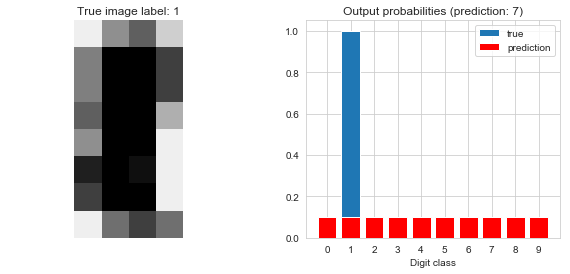

In [65]:
plot_prediction(model, sample_idx=5)

### Train the model for several epochs

In [66]:
losses, losses_test, accuracies, accuracies_test = [], [], [], []
losses.append(model.loss(X_train, y_train))
losses_test.append(model.loss(X_test, y_test))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))

print("Random init: train loss: %0.5f, train acc: %0.3f, test acc: %0.3f"
      % (losses[-1], accuracies[-1], accuracies_test[-1]))

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)

    losses.append(model.loss(X_train, y_train))
    losses_test.append(model.loss(X_test, y_test))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print("Epoch #%d, train loss: %0.5f, train acc: %0.3f, test acc: %0.3f"
          % (epoch + 1, losses[-1], accuracies[-1], accuracies_test[-1]))

Random init: train loss: 2.30237, train acc: 0.102, test acc: 0.089
Epoch #1, train loss: 0.42349, train acc: 0.885, test acc: 0.863
Epoch #2, train loss: 0.20655, train acc: 0.952, test acc: 0.930
Epoch #3, train loss: 0.12975, train acc: 0.974, test acc: 0.937
Epoch #4, train loss: 0.09525, train acc: 0.980, test acc: 0.952
Epoch #5, train loss: 0.08149, train acc: 0.985, test acc: 0.956
Epoch #6, train loss: 0.06036, train acc: 0.991, test acc: 0.956
Epoch #7, train loss: 0.05036, train acc: 0.993, test acc: 0.956
Epoch #8, train loss: 0.04155, train acc: 0.994, test acc: 0.959
Epoch #9, train loss: 0.03515, train acc: 0.996, test acc: 0.967
Epoch #10, train loss: 0.03178, train acc: 0.997, test acc: 0.967
Epoch #11, train loss: 0.02709, train acc: 0.997, test acc: 0.967
Epoch #12, train loss: 0.02377, train acc: 0.998, test acc: 0.967
Epoch #13, train loss: 0.02174, train acc: 0.999, test acc: 0.967
Epoch #14, train loss: 0.01917, train acc: 0.999, test acc: 0.967
Epoch #15, train 

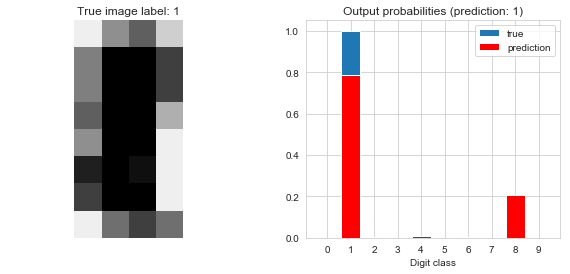

In [67]:
plot_prediction(model, sample_idx=5)

## Loss evolution per epoch

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(losses,label='train')
ax.plot(losses_test,label='test')
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend(loc='best');
ax.set_title("Training loss");
ax = fig.add_subplot(1,2,2)
ax.plot(accuracies, label='train')
ax.plot(accuracies_test, label='test')
ax.set_ylabel("accuracy")
ax.set_xlabel("Epochs")
ax.legend(loc='best');
ax.set_title("Accuracy");

In [ ]:
plot_prediction(model, sample_idx=4)

## Tensorflow/keras

### Implement the same multi layer perceptron using Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

n_features = 64
n_classes = 10
n_hidden = 10

#TODO

In [ ]:
# %load solutions/mlp_keras.py


### Implement a function that produce the same results that the plot_prediction function but with keras model output

In [ ]:
# %load solutions/plot_prediction_keras.py

### Compare loss and accuracy of keras and numpy

In [ ]:
# %load solutions/compare_loss_acc.py